# Energetikos pasiskirstymas Lietuvoje ir pasaulyje

## Uždaviniai:
### 1) Palyginti elektros energijos rūšių pasiskirstymą Lietuvoje ir pasaulyje;
### 2) Patikrinti, ar daugėja atsinaujinančių išteklių elektros gamybai santykis, lyginant su neatsinaujinančiais;
### 3) Sužinoti, ar mažėja iškastinio kuro naudojimas, ar mažėja branduolinės energijos naudojimas;
### 4) Rasti pirmaujančias šalis, naudojančias atsinaujinančius išteklius elektros gamybai;
### 5) Išskirti valstybes, sunaudojančias daugiausiai energijos;
### 6) Išskirti pirmaujančias žaliavas naudojamas energijos gamybai;
### 7) Palyginti energijos sunaudojimo priklausomybę nuo gyventojų dydžio ir BVP

In [1]:
import pandas as pd
import numpy as np

* Duomenų įkėlimas

In [2]:
# Duomenų lentelė energijos gamybos ir sunaudojimo pasaulyje paimta iš https://www.kaggle.com
data = pd.read_csv('World Energy Consumption.csv', usecols=[0, 1, 2, 16, 23, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 46, 54, 57, 63, 67, 72, 78, 85, 88, 95, 98, 99, 105, 111, 114, 119])

In [3]:
data.head()

,iso_code,country,year,biofuel_consumption,coal_consumption,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,...,nuclear_consumption,oil_consumption,oil_production,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,gdp,wind_consumption
0,AFG,Afghanistan,1900,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5021241.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5053439.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5085403.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5118005.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5150814.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Palyginimui naudoju duomenų paskutinių 20 metų laikotarpį
dataf=data[(data['year']>=2000)&(data['year']<2020)]

In [5]:
dataf.isna().sum()

iso_code                                    485
country                                       0
year                                          0
biofuel_consumption                        2460
coal_consumption                           2804
coal_production                            2099
electricity_generation                      204
biofuel_electricity                         604
coal_electricity                            384
fossil_electricity                          384
gas_electricity                             384
hydro_electricity                           204
nuclear_electricity                         204
oil_electricity                             384
other_renewable_electricity                 224
other_renewable_exc_biofuel_electricity     604
renewables_electricity                      224
solar_electricity                           204
wind_electricity                            204
energy_per_capita                           867
fossil_fuel_consumption                 

In [6]:
#Lentelėje pašalinama World eilutė ir paliekamos tik valstybės, turinčios iso_code
dataf=dataf[dataf['country']!='World'].dropna(how='any', subset=['iso_code'])

In [7]:
dataf

,iso_code,country,year,biofuel_consumption,coal_consumption,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,...,nuclear_consumption,oil_consumption,oil_production,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,gdp,wind_consumption
100,AFG,Afghanistan,2000,NaN,NaN,0.006,0.467,0.000,0.000,0.155,...,NaN,NaN,NaN,NaN,20780000.0,5.777,NaN,NaN,1.650883e+10,NaN
101,AFG,Afghanistan,2001,NaN,NaN,0.151,0.592,0.000,0.000,0.094,...,NaN,NaN,NaN,NaN,21607000.0,4.481,NaN,NaN,1.557484e+10,NaN
102,AFG,Afghanistan,2002,NaN,NaN,0.122,0.687,0.000,0.000,0.132,...,NaN,NaN,NaN,NaN,22601000.0,4.262,NaN,NaN,2.567680e+10,NaN
103,AFG,Afghanistan,2003,NaN,NaN,0.203,0.939,0.000,0.000,0.309,...,NaN,NaN,NaN,NaN,23681000.0,5.041,NaN,NaN,2.780556e+10,NaN
104,AFG,Afghanistan,2004,NaN,NaN,0.197,0.894,0.000,0.000,0.329,...,NaN,NaN,NaN,NaN,24727000.0,4.669,NaN,NaN,2.844769e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,ZWE,Zimbabwe,2015,0.0,NaN,32.517,9.388,0.128,4.312,4.312,...,NaN,NaN,NaN,NaN,13815000.0,55.642,NaN,NaN,2.503057e+10,NaN
17428,ZWE,Zimbabwe,2016,0.0,NaN,20.260,6.826,0.147,3.715,3.715,...,NaN,NaN,NaN,NaN,14030000.0,47.500,NaN,NaN,2.515176e+10,NaN
17429,ZWE,Zimbabwe,2017,0.0,NaN,21.957,7.310,0.151,3.219,3.219,...,NaN,NaN,NaN,NaN,14237000.0,NaN,NaN,NaN,NaN,NaN
17430,ZWE,Zimbabwe,2018,0.0,NaN,26.910,9.133,0.187,3.932,3.932,...,NaN,NaN,NaN,NaN,14439000.0,NaN,NaN,NaN,NaN,NaN


In [8]:
# Kuriama Lietuvos duomenų lentelė
LT = dataf[dataf['country']=='Lithuania']

In [9]:
LT

,iso_code,country,year,biofuel_consumption,coal_consumption,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,...,nuclear_consumption,oil_consumption,oil_production,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,gdp,wind_consumption
8877,LTU,Lithuania,2000,0.0,1.073,NaN,11.030,0.000,0.0,2.271,...,23.386,28.061,NaN,0.000,3502000.0,77.471,0.943,0.000,3.885867e+10,0.000
8878,LTU,Lithuania,2001,0.0,0.975,NaN,14.294,0.002,0.0,2.604,...,31.356,32.310,NaN,0.006,3474000.0,90.511,0.904,0.000,4.150502e+10,0.000
8879,LTU,Lithuania,2002,0.0,1.571,NaN,17.155,0.004,0.0,2.656,...,38.776,29.912,NaN,0.011,3445000.0,96.481,0.979,0.000,4.284864e+10,0.000
8880,LTU,Lithuania,2003,0.0,2.029,NaN,18.661,0.007,0.0,2.845,...,42.184,28.646,NaN,0.019,3414000.0,101.145,0.905,0.000,4.649873e+10,0.000
8881,LTU,Lithuania,2004,0.0,1.962,NaN,18.582,0.006,0.0,3.052,...,40.880,30.698,NaN,0.016,3381000.0,102.020,1.158,0.000,4.699307e+10,0.003
8882,LTU,Lithuania,2005,0.0,2.149,NaN,14.214,0.007,0.0,3.418,...,27.807,32.765,NaN,0.019,3344000.0,92.801,1.236,0.000,4.991952e+10,0.005
8883,LTU,Lithuania,2006,0.0,2.919,NaN,11.881,0.025,0.0,2.794,...,23.124,32.963,NaN,0.067,3303000.0,88.945,1.165,0.000,5.343832e+10,0.037
8884,LTU,Lithuania,2007,0.0,2.902,NaN,13.240,0.055,0.0,2.825,...,26.119,32.462,NaN,0.143,3259000.0,97.287,1.542,0.000,5.819949e+10,0.282
8885,LTU,Lithuania,2008,0.0,2.462,NaN,13.089,0.069,0.0,2.593,...,26.117,35.340,NaN,0.182,3213000.0,96.422,1.589,0.000,5.974283e+10,0.346
8886,LTU,Lithuania,2009,0.0,1.957,NaN,14.372,0.102,0.0,2.836,...,28.471,30.296,NaN,0.268,3167000.0,88.467,1.794,0.000,5.413712e+10,0.414


In [10]:
# Kuriama pasaulio duomenų lentelė
World = dataf.groupby('year')['fossil_electricity','coal_electricity','oil_electricity','gas_electricity','nuclear_electricity','biofuel_electricity','hydro_electricity','wind_electricity','solar_electricity', 'renewables_electricity'].sum()

C:\Users\Aivaras\AppData\Local\Temp/ipykernel_1200/2512643885.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  World = dataf.groupby('year')['fossil_electricity','coal_electricity','oil_electricity','gas_electricity','nuclear_electricity','biofuel_electricity','hydro_electricity','wind_electricity','solar_electricity', 'renewables_electricity'].sum()


In [11]:
World=World.reset_index()

#### 1) Elektros energijos rūšių pasiskirstymas Lietuvoje ir pasaulyje

<AxesSubplot:title={'center':'Elektros energijos rūšių pasiskirstymas Lietuvoje'}, xlabel='year'>

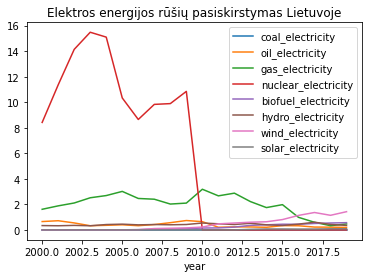

In [12]:
LT.plot(x='year', y=['coal_electricity','oil_electricity','gas_electricity','nuclear_electricity','biofuel_electricity','hydro_electricity','wind_electricity','solar_electricity'], title='Elektros energijos rūšių pasiskirstymas Lietuvoje', kind='line')

Lietuvoje iki 2010 m. (uždaryta IAE) vyravo atominė energetika, šiuo metu pirmauja vėjo energija.

<AxesSubplot:title={'center':'Elektros energijos rūšių pasiskirstymas pasaulyje'}, xlabel='year'>

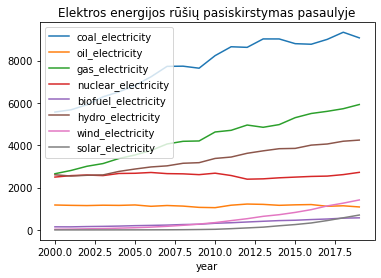

In [13]:
World.plot(x='year', y=['coal_electricity','oil_electricity','gas_electricity','nuclear_electricity','biofuel_electricity','hydro_electricity','wind_electricity','solar_electricity'], title='Elektros energijos rūšių pasiskirstymas pasaulyje', kind='line')

Pasaulyje pirmauja anglies deginimas kuriant elektros energiją.

In [14]:
World

,year,fossil_electricity,coal_electricity,oil_electricity,gas_electricity,nuclear_electricity,biofuel_electricity,hydro_electricity,wind_electricity,solar_electricity,renewables_electricity
0,2000,9404.519,5570.145,1178.101,2656.267,2497.065,147.161,2606.438,31.472,1.067,2858.348
1,2001,9646.596,5675.315,1162.079,2809.208,2566.265,145.610,2546.913,38.403,1.340,2804.174
2,2002,10074.020,5914.084,1151.541,3008.390,2594.152,159.769,2583.264,52.704,1.714,2870.254
3,2003,10592.571,6288.382,1168.413,3135.776,2568.062,169.185,2598.337,64.641,2.094,2909.644
4,2004,11062.480,6526.113,1160.092,3376.275,2668.129,182.397,2765.361,84.722,2.769,3112.059
5,2005,11545.267,6824.086,1180.284,3540.900,2677.217,201.719,2878.090,104.662,3.840,3266.279
6,2006,12107.954,7236.505,1116.974,3754.478,2714.881,214.704,2976.226,132.486,5.167,3408.493
7,2007,12943.717,7728.540,1154.244,4060.936,2660.733,229.713,3027.493,171.323,6.996,3518.182
8,2008,13050.728,7737.114,1126.160,4187.457,2650.261,255.401,3150.054,219.403,11.424,3719.487
9,2009,12911.952,7641.848,1066.382,4203.724,2612.308,267.827,3178.388,277.589,19.388,3830.655


In [15]:
# Suskaičiuojamos neatsinaujančių elektros šaltinių vertės, sukuriant naują stulpelį
World.insert(8, 'non_renewables_electricity', World['coal_electricity']+World['oil_electricity']+World['gas_electricity']+World['nuclear_electricity'])

In [16]:
World

,year,fossil_electricity,coal_electricity,oil_electricity,gas_electricity,nuclear_electricity,biofuel_electricity,hydro_electricity,non_renewables_electricity,wind_electricity,solar_electricity,renewables_electricity
0,2000,9404.519,5570.145,1178.101,2656.267,2497.065,147.161,2606.438,11901.578,31.472,1.067,2858.348
1,2001,9646.596,5675.315,1162.079,2809.208,2566.265,145.610,2546.913,12212.867,38.403,1.340,2804.174
2,2002,10074.020,5914.084,1151.541,3008.390,2594.152,159.769,2583.264,12668.167,52.704,1.714,2870.254
3,2003,10592.571,6288.382,1168.413,3135.776,2568.062,169.185,2598.337,13160.633,64.641,2.094,2909.644
4,2004,11062.480,6526.113,1160.092,3376.275,2668.129,182.397,2765.361,13730.609,84.722,2.769,3112.059
5,2005,11545.267,6824.086,1180.284,3540.900,2677.217,201.719,2878.090,14222.487,104.662,3.840,3266.279
6,2006,12107.954,7236.505,1116.974,3754.478,2714.881,214.704,2976.226,14822.838,132.486,5.167,3408.493
7,2007,12943.717,7728.540,1154.244,4060.936,2660.733,229.713,3027.493,15604.453,171.323,6.996,3518.182
8,2008,13050.728,7737.114,1126.160,4187.457,2650.261,255.401,3150.054,15700.992,219.403,11.424,3719.487
9,2009,12911.952,7641.848,1066.382,4203.724,2612.308,267.827,3178.388,15524.262,277.589,19.388,3830.655


<AxesSubplot:title={'center':'Atsinaujinančių energijos rūšių kitimas pasaulyje'}, xlabel='year'>

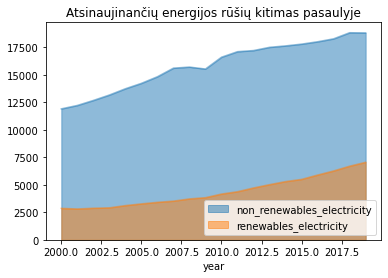

In [17]:
World.plot(x='year', y=['non_renewables_electricity','renewables_electricity'], kind='area', stacked=False, title='Atsinaujinančių energijos rūšių kitimas pasaulyje')

#### 2) Patikrinimas, ar daugėja atsinaujinančių išteklių elektros gamybai, lyginant su neatsinaujinančiais

In [18]:
# Skaičiuojamas santykis tarp atsinaujinančių ir neatsinaujinančių šaltinių elektros gamybai
World.insert(1, 'ratio_renewables', World['renewables_electricity']/(World['fossil_electricity']+World['nuclear_electricity']))

<AxesSubplot:title={'center':'Atsinaujinančių šaltinių elektros gamybai naudojimo santykis su neatsinaujinančiais pasaulyje'}, xlabel='year'>

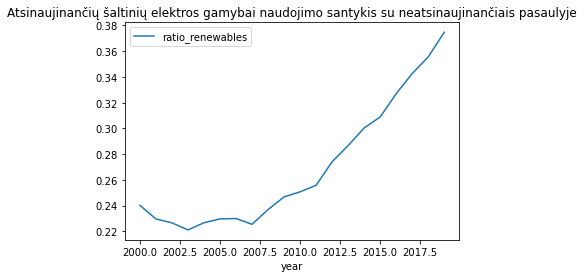

In [19]:
World.plot(x='year', y='ratio_renewables', kind='line', title='Atsinaujinančių šaltinių elektros gamybai naudojimo santykis su neatsinaujinančiais pasaulyje')

Atsinaujinančių šaltinių elektros gamybai daugėja santykyje su neatsinaujinančiais pasaulyje.

#### 3) Tikrinimas: ar mažėja iškastinio kuro naudojimas ir branduolinės energijos naudojimas

<AxesSubplot:title={'center':'Elektros energijos rūšių kitimas pasaulyje'}, xlabel='year'>

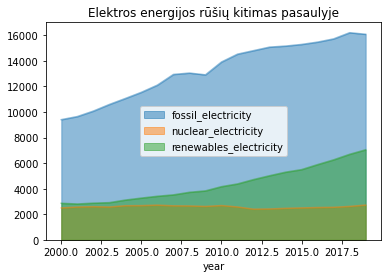

In [20]:
World.plot(x='year', y=['fossil_electricity','nuclear_electricity','renewables_electricity'], kind='area', stacked=False, title='Elektros energijos rūšių kitimas pasaulyje')

Pasaulyje pirmauja elektros energijos gamyba, naudojant iškastinį kurą.
Iškastinio kuro naudojimas didėja, tačiau proporcingai didėja ir atsinaujinančių šaltinių naudojimas.
Branduolinė energetika išlaiko panašų lygį, nes vienos šalys uždarinėja, tačiau kitos plečia šią sritį.

#### 4) Pirmaujančios šalys, elektros gamybai naudojančios atsinaujinančius išteklius

In [21]:
# Lyginami duomenys 10 m. skirtumu
data1=dataf[dataf['year']==2019]

In [22]:
data0=dataf[dataf['year']==2009]

In [23]:
data0

,iso_code,country,year,biofuel_consumption,coal_consumption,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,...,nuclear_consumption,oil_consumption,oil_production,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,gdp,wind_consumption
109,AFG,Afghanistan,2009,NaN,NaN,2.903,0.938,0.000,0.000,0.162,...,NaN,NaN,NaN,NaN,28395000.0,26.808,NaN,NaN,4.753980e+10,NaN
349,ALB,Albania,2009,NaN,NaN,0.027,5.201,0.000,0.000,0.000,...,NaN,NaN,3.597,NaN,2973000.0,32.405,NaN,NaN,2.800652e+10,NaN
469,DZA,Algeria,2009,0.0,5.652,NaN,36.206,0.000,0.000,35.903,...,0.0,180.135,896.773,0.000,35334000.0,448.802,0.897,0.0,3.920000e+11,0.00
509,ASM,American Samoa,2009,NaN,NaN,0.000,0.178,0.000,0.000,0.178,...,NaN,NaN,NaN,NaN,57000.0,2.525,NaN,NaN,NaN,NaN
629,AGO,Angola,2009,0.0,NaN,NaN,4.606,0.000,0.000,1.543,...,NaN,NaN,998.984,NaN,22514000.0,75.871,NaN,NaN,7.551667e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16797,VNM,Vietnam,2009,0.0,129.733,285.786,79.693,0.062,12.288,49.935,...,0.0,171.554,192.954,0.163,87092000.0,457.420,78.837,0.0,3.550000e+11,0.03
16893,ESH,Western Sahara,2009,NaN,NaN,0.000,0.090,0.000,0.000,0.090,...,NaN,NaN,NaN,NaN,474000.0,1.070,NaN,NaN,NaN,NaN
17064,YEM,Yemen,2009,0.0,NaN,NaN,6.339,0.000,0.000,6.339,...,NaN,NaN,166.943,NaN,22516000.0,102.866,NaN,NaN,8.992310e+10,NaN
17301,ZMB,Zambia,2009,0.0,NaN,NaN,9.862,0.054,0.000,0.024,...,NaN,NaN,NaN,NaN,13215000.0,36.820,NaN,NaN,3.535672e+10,NaN


In [24]:
data1

,iso_code,country,year,biofuel_consumption,coal_consumption,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,...,nuclear_consumption,oil_consumption,oil_production,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,gdp,wind_consumption
119,AFG,Afghanistan,2019,NaN,NaN,NaN,1.032,0.000,0.000,0.152,...,NaN,NaN,NaN,NaN,38042000.0,NaN,NaN,NaN,NaN,NaN
359,ALB,Albania,2019,NaN,NaN,NaN,5.176,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,2881000.0,NaN,NaN,NaN,NaN,NaN
479,DZA,Algeria,2019,0.0,5.815,NaN,74.348,0.000,0.000,73.616,...,0.0,244.927,746.781,0.000,43053000.0,705.040,1.923,1.523,NaN,0.025
519,ASM,American Samoa,2019,NaN,NaN,NaN,0.163,0.000,0.000,0.163,...,NaN,NaN,NaN,NaN,55000.0,NaN,NaN,NaN,NaN,NaN
639,AGO,Angola,2019,0.0,NaN,NaN,12.478,0.253,0.000,2.357,...,NaN,NaN,801.912,NaN,31825000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16807,VNM,Vietnam,2019,0.0,574.990,300.440,259.449,0.126,133.008,185.259,...,0.0,296.583,132.857,0.189,96462000.0,1144.207,174.107,10.353,NaN,1.216
16903,ESH,Western Sahara,2019,NaN,NaN,NaN,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,582000.0,NaN,NaN,NaN,NaN,NaN
17074,YEM,Yemen,2019,0.0,NaN,NaN,2.513,0.000,0.000,2.013,...,NaN,NaN,48.983,NaN,29162000.0,NaN,NaN,NaN,NaN,NaN
17311,ZMB,Zambia,2019,0.0,NaN,NaN,16.855,0.080,1.999,3.002,...,NaN,NaN,NaN,NaN,17861000.0,NaN,NaN,NaN,NaN,NaN


In [25]:
# Sudedami neatsinaujinančių elektros šaltinių tipai
data1.insert(1, 'non_renewables_electricity', data1['coal_electricity']+data1['oil_electricity']+data1['gas_electricity']+data1['nuclear_electricity'])
data0.insert(1, 'non_renewables_electricity', data0['coal_electricity']+data0['oil_electricity']+data0['gas_electricity']+data0['nuclear_electricity'])

In [26]:
data1.insert(2, 'ratio_renewables', data1['renewables_electricity']/data1['non_renewables_electricity'])
data0.insert(2, 'ratio_renewables', data0['renewables_electricity']/data0['non_renewables_electricity'])

In [27]:
data1[['country','renewables_electricity','non_renewables_electricity']].sort_values(by='renewables_electricity', ascending=False).head(5)

,country,renewables_electricity,non_renewables_electricity
3464,China,2043.258,5283.442
16368,United States,757.393,3404.441
2233,Brazil,511.053,104.300
3010,Canada,423.820,208.581
7326,India,286.385,1091.789


In [28]:
data1

,iso_code,non_renewables_electricity,ratio_renewables,country,year,biofuel_consumption,coal_consumption,coal_production,electricity_generation,biofuel_electricity,...,nuclear_consumption,oil_consumption,oil_production,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,gdp,wind_consumption
119,AFG,0.152,5.789474,Afghanistan,2019,NaN,NaN,NaN,1.032,0.000,...,NaN,NaN,NaN,NaN,38042000.0,NaN,NaN,NaN,NaN,NaN
359,ALB,0.000,inf,Albania,2019,NaN,NaN,NaN,5.176,0.000,...,NaN,NaN,NaN,NaN,2881000.0,NaN,NaN,NaN,NaN,NaN
479,DZA,73.616,0.009943,Algeria,2019,0.0,5.815,NaN,74.348,0.000,...,0.0,244.927,746.781,0.000,43053000.0,705.040,1.923,1.523,NaN,0.025
519,ASM,0.163,0.000000,American Samoa,2019,NaN,NaN,NaN,0.163,0.000,...,NaN,NaN,NaN,NaN,55000.0,NaN,NaN,NaN,NaN,NaN
639,AGO,2.358,4.292197,Angola,2019,0.0,NaN,NaN,12.478,0.253,...,NaN,NaN,801.912,NaN,31825000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16807,VNM,185.260,0.400459,Vietnam,2019,0.0,574.990,300.440,259.449,0.126,...,0.0,296.583,132.857,0.189,96462000.0,1144.207,174.107,10.353,NaN,1.216
16903,ESH,0.000,NaN,Western Sahara,2019,NaN,NaN,NaN,0.000,0.000,...,NaN,NaN,NaN,NaN,582000.0,NaN,NaN,NaN,NaN,NaN
17074,YEM,2.014,0.248262,Yemen,2019,0.0,NaN,NaN,2.513,0.000,...,NaN,NaN,48.983,NaN,29162000.0,NaN,NaN,NaN,NaN,NaN
17311,ZMB,3.002,4.614590,Zambia,2019,0.0,NaN,NaN,16.855,0.080,...,NaN,NaN,NaN,NaN,17861000.0,NaN,NaN,NaN,NaN,NaN


Daugiausiai atsinaujinančios energijos pagaminančios šalys 2009 m.:

In [29]:
data0[['country','renewables_electricity','non_renewables_electricity']].sort_values(by='renewables_electricity', ascending=False).head(5)

,country,renewables_electricity,non_renewables_electricity
3454,China,611.807,3063.092
16358,United States,413.096,3537.235
2223,Brazil,410.918,47.748
3000,Canada,381.463,215.603
13376,Russia,175.552,762.996


Daugiausiai atsinaujinančios energijos pagaminančios (žmogui) šalys 2019 m.:

In [30]:
data1[['country','ratio_renewables','renewables_electricity','non_renewables_electricity']].sort_values(by='ratio_renewables', ascending=False).head(5)

,country,ratio_renewables,renewables_electricity,non_renewables_electricity
10569,Nepal,inf,5.420,0.000
1843,Bhutan,inf,6.610,0.000
359,Albania,inf,5.176,0.000
8696,Lesotho,inf,0.542,0.000
12461,Paraguay,24910.5,49.821,0.002


Daugiausiai atsinaujinančios energijos pagaminančios (žmogui) šalys 2009 m.:

In [31]:
data0[['country','ratio_renewables','renewables_electricity','non_renewables_electricity']].sort_values(by='ratio_renewables', ascending=False).head(5)

,country,ratio_renewables,renewables_electricity,non_renewables_electricity
349,Albania,inf,5.201,0.000
8686,Lesotho,inf,0.648,0.000
8570,Laos,inf,3.370,0.000
12451,Paraguay,54409.0,54.409,0.001
7196,Iceland,8354.5,16.709,0.002


In [32]:
dataw1=data[(data['country']=='World')&(data['year']==2019)]

In [33]:
dataw1

,iso_code,country,year,biofuel_consumption,coal_consumption,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,...,nuclear_consumption,oil_consumption,oil_production,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,gdp,wind_consumption
17023,OWID_WRL,World,2019,1101.949,43849.215,46548.716,25899.806,572.538,9081.622,16114.042,...,6923.412,53619.925,52069.986,1614.027,7.713468e+09,162194.29,18504.151,1792.996,NaN,3540.051


In [34]:
dataw1=dataw1[['coal_electricity','oil_electricity','gas_electricity','nuclear_electricity','biofuel_electricity','hydro_electricity','wind_electricity','solar_electricity','other_renewable_electricity']].T

In [35]:
dataw1.rename(columns= {17023: 'tipas'}, inplace=True)

Elektros energijos rūšių pasiskirstymas pasaulyje 2019 m.

In [36]:
dataw1

,tipas
coal_electricity,9081.622
oil_electricity,1089.308
gas_electricity,5943.112
nuclear_electricity,2720.674
biofuel_electricity,572.538
hydro_electricity,4261.241
wind_electricity,1416.947
solar_electricity,704.024
other_renewable_electricity,682.877


<AxesSubplot:title={'center':'Elektros energijos rūšių pasiskirstymas pasaulyje 2019 m.'}>

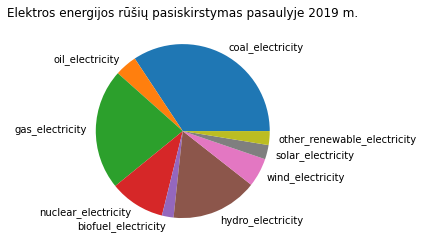

In [37]:
dataw1.plot.pie(y='tipas', ylabel='', legend=False, title='Elektros energijos rūšių pasiskirstymas pasaulyje 2019 m.')

In [38]:
datal1=data[(data['country']=='Lithuania')&(data['year']==2019)]

In [39]:
datal1=datal1[['coal_electricity','oil_electricity','gas_electricity','nuclear_electricity','biofuel_electricity','hydro_electricity','wind_electricity','solar_electricity','other_renewable_electricity']].T

In [40]:
datal1.rename(columns= {8896: 'tipas'}, inplace=True)

<AxesSubplot:title={'center':'Elektros energijos rūšių pasiskirstymas Lietuvoje 2019 m.'}>

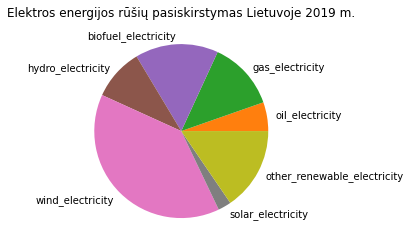

In [41]:
datal1.plot.pie(y='tipas', ylabel='', legend=False, title='Elektros energijos rūšių pasiskirstymas Lietuvoje 2019 m.')

<AxesSubplot:xlabel='year'>

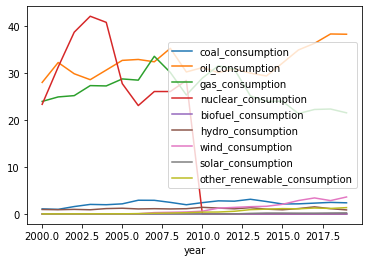

In [42]:
LT.plot(x='year', y=['coal_consumption','oil_consumption','gas_consumption','nuclear_consumption','biofuel_consumption','hydro_consumption','wind_consumption','solar_consumption', 'other_renewable_consumption'], kind='line')

#### 5) Išskyrimas valstybių, sunaudojančių daugiausiai energijos

In [43]:
WorldC = dataf.groupby('year')['coal_consumption','oil_consumption','gas_consumption','nuclear_consumption','biofuel_consumption','hydro_consumption','wind_consumption','solar_consumption', 'other_renewable_consumption'].sum()

C:\Users\Aivaras\AppData\Local\Temp/ipykernel_1200/3898189324.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  WorldC = dataf.groupby('year')['coal_consumption','oil_consumption','gas_consumption','nuclear_consumption','biofuel_consumption','hydro_consumption','wind_consumption','solar_consumption', 'other_renewable_consumption'].sum()


In [44]:
WorldC=WorldC.reset_index()

In [45]:
WorldC

,year,coal_consumption,oil_consumption,gas_consumption,nuclear_consumption,biofuel_consumption,hydro_consumption,wind_consumption,solar_consumption,other_renewable_consumption
0,2000,26984.006,41023.866,23557.143,7163.601,114.331,6748.406,86.565,3.094,499.784
1,2001,27413.359,41335.195,23844.420,7318.230,114.345,6527.596,105.205,3.837,511.730
2,2002,28500.652,41657.520,24536.810,7386.475,135.087,6590.667,142.487,4.802,547.822
3,2003,31035.284,42570.203,25208.465,7191.144,153.697,6517.000,170.448,6.106,574.738
4,2004,33186.444,44137.775,26158.403,7469.728,188.774,6972.177,229.249,7.998,616.271
5,2005,35694.479,44624.301,26862.044,7440.607,228.328,7169.268,278.912,11.119,664.377
6,2006,37582.850,45121.930,27563.116,7486.225,289.790,7416.217,353.790,15.181,702.999
7,2007,39777.435,45663.785,28657.228,7287.924,383.857,7493.083,452.176,20.489,759.841
8,2008,40296.484,45203.184,29345.050,7220.376,523.684,7913.278,581.197,33.131,806.939
9,2009,39718.552,44280.981,28752.824,7074.131,597.898,7841.710,721.911,54.674,863.265


<AxesSubplot:xlabel='year'>

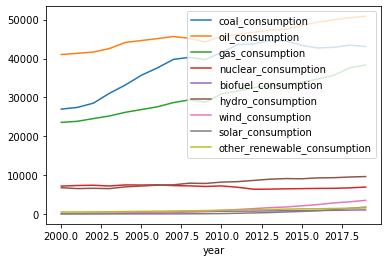

In [46]:
WorldC.plot(x='year', y=['coal_consumption','oil_consumption','gas_consumption','nuclear_consumption','biofuel_consumption','hydro_consumption','wind_consumption','solar_consumption', 'other_renewable_consumption'], kind='line')

In [47]:
dataC=dataf[dataf['year']==2019]

In [48]:
dataC

,iso_code,country,year,biofuel_consumption,coal_consumption,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,...,nuclear_consumption,oil_consumption,oil_production,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,gdp,wind_consumption
119,AFG,Afghanistan,2019,NaN,NaN,NaN,1.032,0.000,0.000,0.152,...,NaN,NaN,NaN,NaN,38042000.0,NaN,NaN,NaN,NaN,NaN
359,ALB,Albania,2019,NaN,NaN,NaN,5.176,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,2881000.0,NaN,NaN,NaN,NaN,NaN
479,DZA,Algeria,2019,0.0,5.815,NaN,74.348,0.000,0.000,73.616,...,0.0,244.927,746.781,0.000,43053000.0,705.040,1.923,1.523,NaN,0.025
519,ASM,American Samoa,2019,NaN,NaN,NaN,0.163,0.000,0.000,0.163,...,NaN,NaN,NaN,NaN,55000.0,NaN,NaN,NaN,NaN,NaN
639,AGO,Angola,2019,0.0,NaN,NaN,12.478,0.253,0.000,2.357,...,NaN,NaN,801.912,NaN,31825000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16807,VNM,Vietnam,2019,0.0,574.990,300.440,259.449,0.126,133.008,185.259,...,0.0,296.583,132.857,0.189,96462000.0,1144.207,174.107,10.353,NaN,1.216
16903,ESH,Western Sahara,2019,NaN,NaN,NaN,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,582000.0,NaN,NaN,NaN,NaN,NaN
17074,YEM,Yemen,2019,0.0,NaN,NaN,2.513,0.000,0.000,2.013,...,NaN,NaN,48.983,NaN,29162000.0,NaN,NaN,NaN,NaN,NaN
17311,ZMB,Zambia,2019,0.0,NaN,NaN,16.855,0.080,1.999,3.002,...,NaN,NaN,NaN,NaN,17861000.0,NaN,NaN,NaN,NaN,NaN


In [49]:
dataC.insert(1, 'Total_Consumption', dataC['coal_consumption']+dataC['oil_consumption']+dataC['gas_consumption']+dataC['nuclear_consumption']+dataC['biofuel_consumption']+dataC['hydro_consumption']+dataC['wind_consumption']+dataC['solar_consumption']+dataC['other_renewable_consumption'])

In [50]:
dataC

,iso_code,Total_Consumption,country,year,biofuel_consumption,coal_consumption,coal_production,electricity_generation,biofuel_electricity,coal_electricity,...,nuclear_consumption,oil_consumption,oil_production,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,gdp,wind_consumption
119,AFG,NaN,Afghanistan,2019,NaN,NaN,NaN,1.032,0.000,0.000,...,NaN,NaN,NaN,NaN,38042000.0,NaN,NaN,NaN,NaN,NaN
359,ALB,NaN,Albania,2019,NaN,NaN,NaN,5.176,0.000,0.000,...,NaN,NaN,NaN,NaN,2881000.0,NaN,NaN,NaN,NaN,NaN
479,DZA,705.040,Algeria,2019,0.0,5.815,NaN,74.348,0.000,0.000,...,0.0,244.927,746.781,0.000,43053000.0,705.040,1.923,1.523,NaN,0.025
519,ASM,NaN,American Samoa,2019,NaN,NaN,NaN,0.163,0.000,0.000,...,NaN,NaN,NaN,NaN,55000.0,NaN,NaN,NaN,NaN,NaN
639,AGO,NaN,Angola,2019,0.0,NaN,NaN,12.478,0.253,0.000,...,NaN,NaN,801.912,NaN,31825000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16807,VNM,1144.208,Vietnam,2019,0.0,574.990,300.440,259.449,0.126,133.008,...,0.0,296.583,132.857,0.189,96462000.0,1144.207,174.107,10.353,NaN,1.216
16903,ESH,NaN,Western Sahara,2019,NaN,NaN,NaN,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,582000.0,NaN,NaN,NaN,NaN,NaN
17074,YEM,NaN,Yemen,2019,0.0,NaN,NaN,2.513,0.000,0.000,...,NaN,NaN,48.983,NaN,29162000.0,NaN,NaN,NaN,NaN,NaN
17311,ZMB,NaN,Zambia,2019,0.0,NaN,NaN,16.855,0.080,1.999,...,NaN,NaN,NaN,NaN,17861000.0,NaN,NaN,NaN,NaN,NaN


Daugiausiai energijos sunaudojančios šalys:

In [51]:
dataC[['country','Total_Consumption','renewables_consumption','fossil_fuel_consumption', 'energy_per_capita']].sort_values(by='Total_Consumption', ascending=False).head(10)

,country,Total_Consumption,renewables_consumption,fossil_fuel_consumption,energy_per_capita
3464,China,39360.927,4984.982,33512.486,27452.478
16368,United States,26291.356,2290.491,21891.102,79897.151
7326,India,9460.984,736.188,8612.962,6923.931
13386,Russia,8279.180,485.825,7275.860,56756.466
8210,Japan,5181.739,483.082,4536.130,40888.804
3010,Canada,3948.353,1091.247,2608.280,105539.881
6133,Germany,3649.976,638.183,2825.900,43703.379
2233,Brazil,3445.401,1550.999,1854.374,16325.047
14430,South Korea,3436.343,87.268,2987.572,67083.320
7567,Iran,3428.864,73.087,3339.902,41354.455


Daugiausiai sunaudojamos energijos, tenkančios žmogui, sunaudojančios šalys

In [52]:
dataC[['country','Total_Consumption','renewables_consumption','fossil_fuel_consumption', 'energy_per_capita']].sort_values(by='energy_per_capita', ascending=False).head(10)

,country,Total_Consumption,renewables_consumption,fossil_fuel_consumption,energy_per_capita
13105,Qatar,561.920,0.305,561.615,198418.117
7206,Iceland,60.805,48.245,12.561,179962.796
13966,Singapore,986.018,2.355,983.664,169886.083
15557,Trinidad and Tobago,198.256,0.012,198.244,142118.820
16127,United Arab Emirates,1341.732,10.342,1331.390,137317.770
8512,Kuwait,454.890,0.396,454.495,108127.063
3010,Canada,3948.353,1091.247,2608.280,105539.881
11574,Norway,486.412,324.799,161.613,91240.272
13762,Saudi Arabia,3065.428,4.410,3061.018,89451.938
11812,Oman,420.549,0.009,420.540,84532.482


#### 6) Išskyrimas pirmaujančių žaliavų, naudojamų energijos gamybai

In [53]:
datawC=data[(data['country']=='World')&(data['year']==2019)]

In [54]:
datawC=datawC[['coal_consumption','oil_consumption','gas_consumption','nuclear_consumption','biofuel_consumption','hydro_consumption','wind_consumption','solar_consumption', 'other_renewable_consumption']].T

In [55]:
print('Energijos sunaudojimas pagal tipą pasaulyje:', datawC.sort_values(by=17023, ascending=False))

Energijos sunaudojimas pagal tipą pasaulyje:                                  17023
oil_consumption              53619.925
coal_consumption             43849.215
gas_consumption              39292.468
hydro_consumption            10455.127
nuclear_consumption           6923.412
wind_consumption              3540.051
solar_consumption             1792.996
other_renewable_consumption   1614.027
biofuel_consumption           1101.949


<AxesSubplot:title={'center':'Sunaudojamos energijos pasiskirstymas pagal tipą pasaulyje 2019 m.'}>

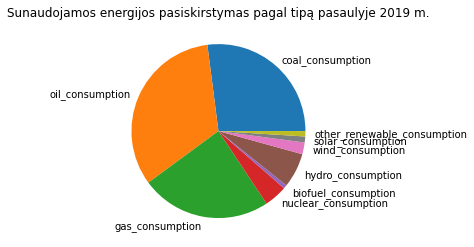

In [56]:
datawC.plot.pie(y=17023, ylabel='', legend=False, title='Sunaudojamos energijos pasiskirstymas pagal tipą pasaulyje 2019 m.')

Pasaulyje energetikoje pirmauja naftos panaudojimas

In [57]:
dataLC=data[(data['country']=='Lithuania')&(data['year']==2019)]
dataLC=dataLC[['coal_consumption','oil_consumption','gas_consumption','nuclear_consumption','biofuel_consumption','hydro_consumption','wind_consumption','solar_consumption', 'other_renewable_consumption']].T
print('Energijos sunaudojimas pagal tipą Lietuvoje:', dataLC.sort_values(by=8896, ascending=False))

Energijos sunaudojimas pagal tipą Lietuvoje:                                8896
oil_consumption              38.345
gas_consumption              21.572
wind_consumption              3.613
coal_consumption              2.370
other_renewable_consumption   1.347
hydro_consumption             0.857
solar_consumption             0.223
nuclear_consumption           0.000
biofuel_consumption           0.000


<AxesSubplot:title={'center':'Sunaudojamos energijos pasiskirstymas pagal tipą Lietuvoje 2019 m.'}>

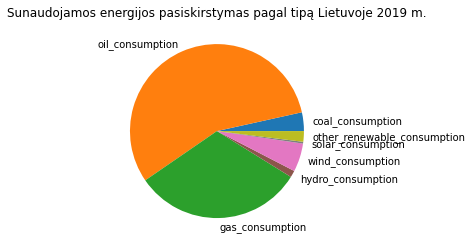

In [58]:
dataLC.plot.pie(y=8896, ylabel='', legend=False, title='Sunaudojamos energijos pasiskirstymas pagal tipą Lietuvoje 2019 m.')

Lietuvos energetikoje vyrauja naftos panaudojimas

#### 7) Energijos sunaudojimo priklausomybių nuo gyventojų dydžio ir BVP palyginimas

* Tiesinės regresijos panaudojimas, siejant gyventojų kiekį ir energijos suvartojimą

In [59]:
dataCP=dataC[['iso_code', 'country', 'Total_Consumption', 'population']]

In [60]:
dataCP

,iso_code,country,Total_Consumption,population
119,AFG,Afghanistan,NaN,38042000.0
359,ALB,Albania,NaN,2881000.0
479,DZA,Algeria,705.040,43053000.0
519,ASM,American Samoa,NaN,55000.0
639,AGO,Angola,NaN,31825000.0
...,...,...,...,...
16807,VNM,Vietnam,1144.208,96462000.0
16903,ESH,Western Sahara,NaN,582000.0
17074,YEM,Yemen,NaN,29162000.0
17311,ZMB,Zambia,NaN,17861000.0


In [61]:
dataCP=dataCP.dropna()

In [62]:
dataCP

,iso_code,country,Total_Consumption,population
479,DZA,Algeria,705.040,43053000.0
799,ARG,Argentina,961.880,44781000.0
1037,AUS,Australia,1780.443,25203000.0
1158,AUT,Austria,416.623,8955000.0
1199,AZE,Azerbaijan,182.144,10048000.0
...,...,...,...,...
16247,GBR,United Kingdom,2177.825,67530000.0
16368,USA,United States,26291.356,329064992.0
16527,UZB,Uzbekistan,495.468,32982000.0
16687,VEN,Venezuela,618.566,28516000.0


<AxesSubplot:xlabel='population', ylabel='Total_Consumption'>

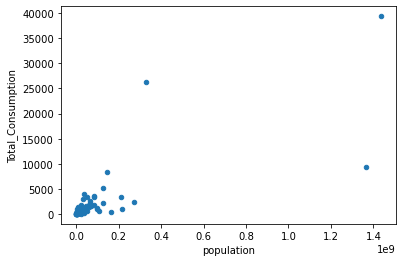

In [63]:
dataCP.plot.scatter(x='population', y='Total_Consumption')

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
x = dataCP[['population']]
y = dataCP['Total_Consumption']

In [66]:
model = LinearRegression()

In [67]:
model.fit(x, y)

LinearRegression()

In [68]:
model.predict(x)

array([ 1319.81973933,  1351.89874294,   988.44808753,   686.81634531,
         707.10705766,  3547.39837324,   696.04277169,   734.78633681,
        4438.55606362,   650.52325964,  1215.08030743,   872.40303456,
       27137.68247859,  1455.07877883,   597.24389601,   542.83211386,
         719.00673434,   627.72637513,   843.10866669,  2384.20033632,
         545.18977211,   623.27095796,  1729.662426  ,  2071.00307371,
         714.99685889,   658.61726749,   700.36823919,   526.86686901,
       25887.08371122,  5544.53882138,  2059.80883808,  1250.33379576,
         611.20420314,   678.72233746,  1644.63821506,  2875.63284986,
         864.95877504,   598.67334235,   555.9755945 ,   571.81088968,
         532.00916299,  1113.70100264,  2888.92484441,  1197.64848776,
         837.96637271,   609.36634356,   559.24290043,   620.43062952,
         612.93067729,  4540.93768876,  1124.09697603,  2527.68333334,
        1223.93544905,   710.41149206,   573.14751483,   880.07006494,
      

In [69]:
dataCP['Consumption_Prediction']=model.predict(x)

C:\Users\Aivaras\AppData\Local\Temp/ipykernel_1200/433884238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCP['Consumption_Prediction']=model.predict(x)


In [70]:
prediction = model.predict(x)

In [71]:
import matplotlib.pyplot as plt

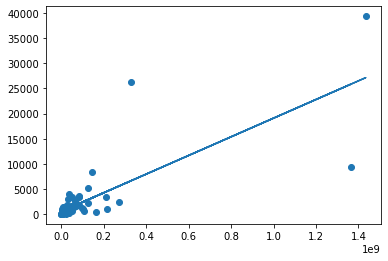

In [72]:
plt.scatter(x, y)
plt.plot(x, prediction)

In [73]:
r_squared = model.score(x,y)

In [74]:
r_squared

0.5957497973439845

* Tiesinės regresijos panaudojimas, siejant GBP ir energijos suvartojimą

In [75]:
dataCR=dataC[['iso_code', 'country', 'Total_Consumption', 'gdp']]

In [76]:
dataCR[(dataCR['Total_Consumption']>0)&(dataCR['gdp']>0)].isna()

,iso_code,country,Total_Consumption,gdp


In [77]:
# Turimoje lentelėje trūksta paskutinių metų BVP duomenų, todėl bus jungiama nauja duomenų lentelė
# Duomenų lentelė GDP pagal šalis ir metus paimta iš https://www.kaggle.com
data_gdp = pd.read_csv('Countries_GDP_1960-2020.csv', usecols=[0, 1, 61])

In [78]:
data_gdp

,Country Name,Country Code,2019
0,Africa Eastern and Southern,AFE,1.010000e+12
1,Africa Western and Central,AFW,7.950000e+11
2,Australia,AUS,1.390000e+12
3,Austria,AUT,4.450000e+11
4,Burundi,BDI,2.631434e+09
...,...,...,...
115,St. Vincent and the Grenadines,VCT,8.250407e+08
116,World,WLD,8.760000e+13
117,South Africa,ZAF,3.880000e+11
118,Zambia,ZMB,2.330867e+10


In [79]:
# Jungiama per valstybės kodą
dataCR = dataCR.merge(data_gdp, left_on='iso_code', right_on='Country Code', how='inner')

In [80]:
dataCR

,iso_code,country,Total_Consumption,gdp,Country Name,Country Code,2019
0,DZA,Algeria,705.040,NaN,Algeria,DZA,1.720000e+11
1,AUS,Australia,1780.443,NaN,Australia,AUS,1.390000e+12
2,AUT,Austria,416.623,NaN,Austria,AUT,4.450000e+11
3,BHS,Bahamas,NaN,NaN,"Bahamas, The",BHS,1.316440e+10
4,BGD,Bangladesh,488.385,NaN,Bangladesh,BGD,3.030000e+11
...,...,...,...,...,...,...,...
82,GBR,United Kingdom,2177.825,NaN,United Kingdom,GBR,2.880000e+12
83,USA,United States,26291.356,NaN,United States,USA,2.140000e+13
84,URY,Uruguay,NaN,NaN,Uruguay,URY,6.123115e+10
85,ZMB,Zambia,NaN,NaN,Zambia,ZMB,2.330867e+10


In [81]:
dataCR = dataCR.drop(['gdp', 'Country Name', 'Country Code'], axis='columns')

In [82]:
dataCR

,iso_code,country,Total_Consumption,2019
0,DZA,Algeria,705.040,1.720000e+11
1,AUS,Australia,1780.443,1.390000e+12
2,AUT,Austria,416.623,4.450000e+11
3,BHS,Bahamas,NaN,1.316440e+10
4,BGD,Bangladesh,488.385,3.030000e+11
...,...,...,...,...
82,GBR,United Kingdom,2177.825,2.880000e+12
83,USA,United States,26291.356,2.140000e+13
84,URY,Uruguay,NaN,6.123115e+10
85,ZMB,Zambia,NaN,2.330867e+10


In [83]:
dataCR.rename(columns= {'2019': 'GDP'}, inplace=True)

In [84]:
dataCR=dataCR.dropna()

In [85]:
dataCR

,iso_code,country,Total_Consumption,GDP
0,DZA,Algeria,705.040,1.720000e+11
1,AUS,Australia,1780.443,1.390000e+12
2,AUT,Austria,416.623,4.450000e+11
4,BGD,Bangladesh,488.385,3.030000e+11
5,BEL,Belgium,753.528,5.350000e+11
14,CAN,Canada,3948.353,1.740000e+12
17,CHL,Chile,459.951,2.790000e+11
18,CHN,China,39360.927,1.430000e+13
19,COL,Colombia,534.511,3.230000e+11
24,ECU,Ecuador,206.471,1.080000e+11


<AxesSubplot:xlabel='GDP', ylabel='Total_Consumption'>

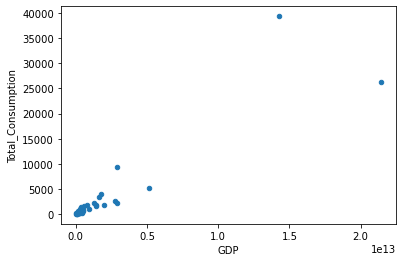

In [86]:
dataCR.plot.scatter(x='GDP', y='Total_Consumption')

In [87]:
x = dataCR[['GDP']]
y = dataCR['Total_Consumption']

In [88]:
x

,GDP
0,1.720000e+11
1,1.390000e+12
2,4.450000e+11
4,3.030000e+11
5,5.350000e+11
14,1.740000e+12
17,2.790000e+11
18,1.430000e+13
19,3.230000e+11
24,1.080000e+11


In [89]:
y

0       705.040
1      1780.443
2       416.623
4       488.385
5       753.528
14     3948.353
17      459.951
18    39360.927
19      534.511
24      206.471
26      304.913
27     2688.651
30      316.233
35      344.747
36       60.805
37     9460.984
38      182.198
39     1770.422
41     5181.739
44       45.805
47     1179.391
48     2144.651
49      263.618
51      975.326
55      486.412
56      989.031
59      317.910
60      555.883
61      289.685
69      986.018
70     1499.315
71     3436.343
72     1589.264
73       99.617
76      622.702
77     1559.518
79      198.256
80     1801.027
82     2177.825
83    26291.356
Name: Total_Consumption, dtype: float64

In [90]:
model = LinearRegression()

In [91]:
model.fit(x, y)

LinearRegression()

In [92]:
model.predict(x)

array([  375.23681568,  2400.2602925 ,   829.12138807,   593.03490719,
         978.75366468,  2982.16359043,   553.13296677, 23864.17908203,
         626.28652422,   268.8316412 ,   536.50715825,  4628.11863316,
         430.10198377,   692.78975827,   130.60091254,  4860.87995233,
         752.64266891,  3431.06042027,  8651.56429317,   205.97896169,
         696.11491997,  2200.75059035,   288.78261142,  1602.2214839 ,
         762.61815402,   553.13296677,   468.34134335,   716.06589019,
         488.29231357,   711.07814763,   734.35427955,  2832.53131382,
        2400.2602925 ,   228.91464933,   977.09108383,   993.71689234,
         127.85862858,  1354.49693706,  4877.50576085, 35668.50312585])

In [93]:
dataCR['Consumption_Prediction']=model.predict(x)

C:\Users\Aivaras\AppData\Local\Temp/ipykernel_1200/4131059981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCR['Consumption_Prediction']=model.predict(x)


In [94]:
prediction = model.predict(x)

In [95]:
dataCR

,iso_code,country,Total_Consumption,GDP,Consumption_Prediction
0,DZA,Algeria,705.040,1.720000e+11,375.236816
1,AUS,Australia,1780.443,1.390000e+12,2400.260292
2,AUT,Austria,416.623,4.450000e+11,829.121388
4,BGD,Bangladesh,488.385,3.030000e+11,593.034907
5,BEL,Belgium,753.528,5.350000e+11,978.753665
14,CAN,Canada,3948.353,1.740000e+12,2982.163590
17,CHL,Chile,459.951,2.790000e+11,553.132967
18,CHN,China,39360.927,1.430000e+13,23864.179082
19,COL,Colombia,534.511,3.230000e+11,626.286524
24,ECU,Ecuador,206.471,1.080000e+11,268.831641


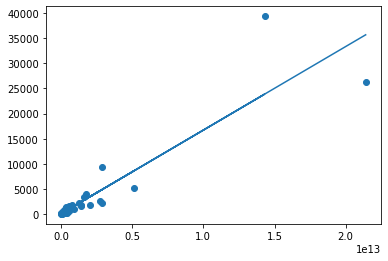

In [96]:
plt.scatter(x, y)
plt.plot(x, prediction)

In [97]:
r_squared = model.score(x,y)

In [98]:
r_squared

0.8175539372699078

Nustatyta, kad sunaudojamo energijos kiekio yra priklausomybė nuo BVP yra didesnė nei nuo populiacijos dydžio

In [99]:
def pabaiga():
    print("Ačiū už Python modulį!")

In [100]:
pabaiga()

Ačiū už Python modulį!
